<a href="https://colab.research.google.com/github/hailes1/MCMProjects/blob/main/Magic_Squares_Assignment_Dag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Magic Squares Assignment

Math 242 Modern Computational Mathematics

A $n \times n$ **magic square** is an arrangement of the numbers $1, 2, \ldots, n^2$ in a $n \times n$ grid in such a way that all of the rows, columns, and diagonals have the same sum. 
Here is an example of a $3 \times 3$ magic square:

$$\begin{array}{|c|c|c|}
 \hline
 4 & 9 & 2\\
 \hline
 3 & 5 & 7\\
 \hline
 8 & 1 & 6\\
 \hline
 \end{array} $$

Specifically, there are $n$ rows, $n$ columns, and $2$ diagonals, each of which adds up to $\frac{1}{2}n(n^2+1)$. 


## Your Task

Use simulated annealing to find magic squares for at $n=3$ and $n=4$. (You may find larger magic squares if you like!) To do this, you must first convert the problem of finding a magic square to the problem of minimizing a function $f : \Omega \to \mathbb{R}$.

For each value of $n$, answer the following questions:

1. What values of `k` and `decFac` do you find to work best?
2. Using your preferred choice of `k` and `decFac`, what is the average number of steps required to find a magic square?
3. How does the value of your function $f$ change during the simulated annealing process? Make a plot that shows this clearly.

This is an *assignment*, not a *project*. The important thing is to write code that works and answer the three questions above for $n=3$ and $n=4$.

In [ ]:
import math
import random
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt

In [ ]:
n = 3
rng = default_rng()
rng.choice(range(1,n**2+1), (n,n), replace = False)

array([[7, 3, 8],
       [2, 1, 5],
       [9, 6, 4]])

# Simulated annealing to find magic squares for at  n=3

In [ ]:
def randomMatrix(n): 
  matrix = rng.choice(range(1,(n**2)+1),(n,n), replace= False)
  return matrix

In [ ]:
matrix = randomMatrix(3)
print(matrix)

[[4 9 8]
 [3 5 1]
 [6 7 2]]


In [ ]:
# function to propose a move on the domain
def proposeMove(currState, n):
  propState = currState.copy()   
  #print(currState)
  i1 = random.randrange(0,n)
  i2 = random.randrange(0,n)
  j1 = random.randrange(0,n)
  j2 = random.randrange(0,n)

  if i1 == i2 and j1 == j2: 
    i1 = random.randrange(0,n)
    i2 = random.randrange(0,n)
    j1 = random.randrange(0,n)
    j2 = random.randrange(0,n) 

  temp = propState[i1,j1]
  propState[i1,j1] = propState[(i2),(j2)]
  propState[(i2),(j2)] = temp

  return propState 




In [ ]:
proposeMove(currstate, 3)

array([[4, 3, 5],
       [2, 8, 9],
       [1, 6, 7]])

In [ ]:
def f(state):
  #print(state)
  rowsums = np.sum(state, axis = 1)
  colsums = np.sum(state, axis = 0)
  diagsum1 = np.trace(state)
  diagsum2 = np.trace(np.flip(state, axis = 1))
  totalsums = np.concatenate((rowsums, colsums, [diagsum1], [diagsum2]))
  difference = np.abs(15 - totalsums)
  #print(absdifference)
  return np.max(difference)

In [ ]:
# function to make a move, deciding whether or not to accept the proposed move
def doMove(currState, k, n):
  # propose a move
  propState = proposeMove(currState, n)

  # compute the function value difference
  df = f(propState) - f(currState)

  # if df < 0, then make the move
  if df < 0:
    return propState
  
  # if df > 0, then make the move with probability rho
  rho = math.exp(-df/k)
  rand = random.random()   # random number between 0 and 1
  if rand < rho: # then move
    return propState
  # else: don't move
  return currState

starting state: [[5 6 2]
 [4 7 3]
 [9 8 1]]
starting f(state): 9
ending state: [[6 7 2]
 [1 5 9]
 [8 3 4]]
ending f(state): 0
k: 7.274491561439039e-12


'function value'

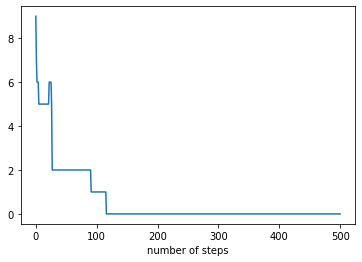

In [ ]:
# simulate the random walk
numSteps = 500
k = 1
decFac = 0.95  # decrease factor

state = randomMatrix(3)

print("starting state:", state)
print("starting f(state):", f(state))

fvals = [f(state)] # keep track of function values 
for i in range(numSteps):
  # make a move
  state = doMove(state, k, 3)
  fvals.append(f(state))

  # decrease k a little bit
  k = k*decFac

print("ending state:", state)
print("ending f(state):", f(state))
print("k:", k)

plt.plot(fvals)
plt.xlabel("number of steps")
plt.ylabel;("function value")

# simulated annealing to find magic squares for at  n=4

In [ ]:
def randomMatrix(n): 
  matrix = rng.choice(range(1,(n**2)+1),(n,n), replace= False)
  return matrix

In [ ]:
# function to propose a move on the domain
def proposeMove(currState, n):
  propState2 = currState.copy()   
  #print(currState)
  i1 = random.randrange(0,n)
  i2 = random.randrange(0,n)
  j1 = random.randrange(0,n)
  j2 = random.randrange(0,n)

  if i1 == i2 and j1 == j2: 
    i1 = random.randrange(0,n)
    i2 = random.randrange(0,n)
    j1 = random.randrange(0,n)
    j2 = random.randrange(0,n) 

  temp = propState2[i1,j1]
  propState2[i1,j1] = propState2[(i2),(j2)]
  propState2[(i2),(j2)] = temp

  return propState2 




In [ ]:
currstate = randomMatrix(4)
proposeMove(currstate, 4)

[[ 8 11  9 16]
 [ 5  4 13  6]
 [15 12 14  2]
 [ 7  3 10  1]]


array([[ 8,  1,  9, 16],
       [ 5,  4, 13,  6],
       [15, 12, 14,  2],
       [ 7,  3, 10, 11]])

In [ ]:
def f2(state):
  #print(state)
  rowsums = np.sum(state, axis = 1)
  colsums = np.sum(state, axis = 0)
  diagsum1 = np.trace(state)
  diagsum2 = np.trace(np.flip(state, axis = 1))
  totalsums = np.concatenate((rowsums, colsums, [diagsum1], [diagsum2]))
  difference = np.abs(34 - totalsums)
  #print(difference)
  return np.max(difference)

In [ ]:
matrix2 = randomMatrix(4)
f2(matrix2)

15

In [ ]:
# function to make a move, deciding whether or not to accept the proposed move
def doMove(currState, k, n):
  # propose a move
  propState = proposeMove(currState, n)

  # compute the function value difference
  df = f(propState) - f(currState)

  # if df < 0, then make the move
  if df < 0:
    return propState
  
  # if df > 0, then make the move with probability rho
  rho = math.exp(-df/k)
  rand = random.random()   # random number between 0 and 1
  if rand < rho: # then move
    return propState
  # else: don't move
  return currState

starting state: [[ 4  6 16  1]
 [11 13 14  3]
 [ 7  9  8 12]
 [10 15  5  2]]
starting f(state): 16
ending state: [[ 6  4 15  9]
 [14  7 12  1]
 [11 10  5  8]
 [ 3 13  2 16]]
ending f(state): 0
k: 6.90420278627408e-14


'function value'

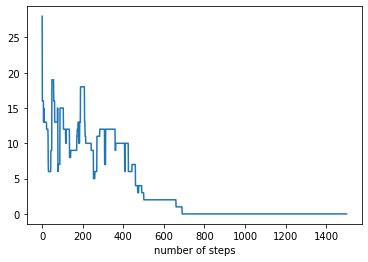

In [ ]:
# simulate the random walk
numSteps = 1500
k = 1
decFac = 0.98  # decrease factor

state = randomMatrix(4)

print("starting state:", state)
print("starting f(state):", f2(state))

fvals = [f(state)] # keep track of function values 
for i in range(numSteps):
  # make a move
  state = doMove(state, k, 4)
  fvals.append(f2(state))

  # decrease k a little bit
  k = k*decFac

print("ending state:", state)
print("ending f(state):", f2(state))
print("k:", k)

plt.plot(fvals)
plt.xlabel("number of steps")
plt.ylabel;("function value")